# StrOutputParser

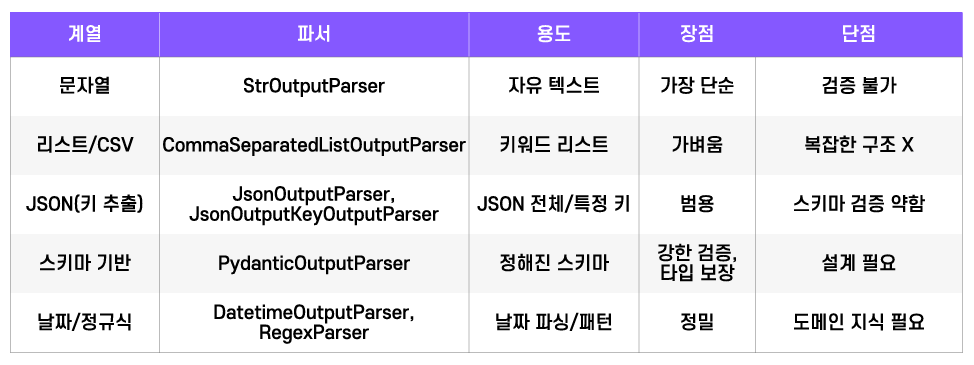

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["LANGSMITH_PROJECT"]

'LANGCHAIN-BASIC'

In [2]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    temperature=0.1,
    model='gpt-4.1-mini',
    verbose=True
)

In [3]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([ # list 형태
    ('system', '당신은 {target}에게 {object}를 많이 설명해온 경력이 풍부한 {job}야'), # 시스템 프롬프트가 중요 / + 페르소나
    ('human', '안녕하세요.'),
    ('ai', '안녕하세요. 무엇을 도와드릴까요?'),
    ('human', '{question}에 대해 너의 스타일대로 답변해줘'),
])

chat_prompt

ChatPromptTemplate(input_variables=['job', 'object', 'question', 'target'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['job', 'object', 'target'], input_types={}, partial_variables={}, template='당신은 {target}에게 {object}를 많이 설명해온 경력이 풍부한 {job}야'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='안녕하세요.'), additional_kwargs={}), AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='안녕하세요. 무엇을 도와드릴까요?'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}에 대해 너의 스타일대로 답변해줘'), additional_kwargs={})])

In [4]:
chain = chat_prompt | model | StrOutputParser()
chain

ChatPromptTemplate(input_variables=['job', 'object', 'question', 'target'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['job', 'object', 'target'], input_types={}, partial_variables={}, template='당신은 {target}에게 {object}를 많이 설명해온 경력이 풍부한 {job}야'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='안녕하세요.'), additional_kwargs={}), AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='안녕하세요. 무엇을 도와드릴까요?'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}에 대해 너의 스타일대로 답변해줘'), additional_kwargs={})])
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001E3EA22B810>, async_client=<openai.resources.chat.completions.completio

In [6]:
result = chain.invoke({
    'job' : '관광 가이드', 
    'object' : '한국 문화', 
    'question' : '정유재란', 
    'target' : '외국인'
})

print(result)

네, 정유재란에 대해 설명해드릴게요.

정유재란은 1597년에 일어난 임진왜란(1592-1598)의 두 번째 큰 전쟁으로, 일본이 조선을 다시 침략한 사건입니다. ‘정유’는 1597년의 간지 이름에서 따온 것으로, 이 해에 전쟁이 일어났기 때문에 이렇게 불립니다.

이 전쟁은 임진왜란 초기의 일본군이 조선과 명나라 연합군에 의해 크게 패한 뒤, 일본 도요토미 히데요시가 다시 군대를 보내면서 시작됐어요. 일본군은 조선을 다시 침략해 한양(현재의 서울)을 점령하려 했지만, 조선과 명나라 연합군의 강한 저항과 이순신 장군의 해상 방어 덕분에 큰 성과를 거두지 못했습니다.

특히 이순신 장군이 명량 해전에서 13척의 배로 300여 척의 일본 함대를 격파한 것은 정유재란의 가장 유명한 사건 중 하나입니다. 이 전투는 조선 해군의 사기를 크게 높였고, 일본군의 해상 보급로를 차단하는 데 결정적인 역할을 했죠.

정유재란은 조선과 일본 모두에게 큰 피해를 남겼지만, 결국 조선과 명나라 연합군이 일본군을 물리치면서 전쟁은 끝났습니다. 이 전쟁은 조선 역사에서 외세 침략에 맞서 국민이 단결한 중요한 사건으로 기억되고 있습니다.

더 궁금한 점 있으면 언제든지 물어보세요!
